In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from scipy.signal import convolve
%matplotlib inline

pi = np.pi

plt.rcParams['font.size'] = 40
plt.rcParams['figure.figsize'] = (40, 10)
plt.rcParams['lines.linewidth'] = 2.0

In [2]:
delta_t = 1/1000
T_s = 1

# Fuer Filterimpulsantworten
t_short = np.r_[-2*T_s:2*T_s+delta_t:delta_t]

In [3]:
def plot_signal(t, signal, T_s=1, delta_t=1/1000, 
                x_label=r'$t/T_\mathrm{s}$', y_label='$x(t)$',
                x_lim=(-1, 5)):
    plt.figure()
    plt.axhline(c='k', lw=2, alpha=0.75)
    plt.plot(t, signal, 'b', lw=4)
    plt.axvline(c='k', lw=2, alpha=0.75)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ylim((min(signal)-0.1, max(signal)+0.1))
    plt.xlim(x_lim)
    plt.grid(True)

In [4]:
def plot_samples(t, signal, T_s=T_s, delta_t=delta_t):
    samp_per_period = int(T_s/delta_t)
    low = int(np.round(t[0]/delta_t))
    upp = int(np.round(t[-1]/delta_t))+1
    
    samp_idx = np.r_[low:upp:samp_per_period]
    samp_val = signal[0:len(t)+1:samp_per_period]
    
    plt.plot(delta_t*samp_idx, samp_val, 'ro', ms=20)
    plt.vlines(delta_t*samp_idx, 0, samp_val, 'r', lw=4)

In [5]:
def plot_pulse(t, signal, T_s=1,
               x_label=r'$t/T_\mathrm{s}$', y_label='$x(t)$'):
    x_lim=(-2, 2)
    plot_signal(**locals())

In [6]:
def plot_complete_pulse(t, signal, T_s=T_s,
                        x_label=r'$t/T_\mathrm{s}$', y_label='$x(t)$'):
    plot_pulse(**locals())
    plot_samples(t, signal, T_s)

In [7]:
def plot_decision_signal(t, signal, T_s=T_s,
                x_label=r'$t/T_\mathrm{s}$', y_label='$x(t)$',
                x_lim=(-1, 8)):
    plot_signal(**locals())
    plot_samples(t, signal, T_s, delta_t)

In [8]:
def plot_eye_diagram(q_t, t, T_s=T_s, delta_t=delta_t, 
                     t_start=-1*T_s, t_end=8*T_s,
                     x_lim=(-1, 1),
                     x_label=r'$t/T_\mathrm{s}$',
                     y_label=r'$q(t)$'):
    t_start = t[0] if t_start is None else t_start
    t_end = t[-1] if t_end is None else t_end
    
    K = int((t_end - t_start)/T_s)
    t_interval = np.r_[-T_s:T_s:delta_t]
        
    plt.figure()
    plt.axhline(c='k', lw=1, alpha=0.75)
    for k in range(1, K):
        current_idx = ( (t_start + (k-1)*T_s <= t)
                       *(t <= t_start + (k+1)*T_s))
        q_current = q_t[current_idx]
        q_samp = q_current[int(len(q_current)/2)]
        plt.plot(t_interval[:len(q_current)], q_current, 
                 'b', lw=3, alpha=0.8)
        plt.plot(0, q_samp, 'ro', ms=10)
    
    plt.axvline(c='k', lw=1, alpha=0.75)
    
    plt.xlim(x_lim)
    y_bound = 1.05*max(abs(q_t.max()), abs(q_t.min()))
    plt.ylim(-y_bound, y_bound)
    
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    plt.gcf().set_size_inches((5, 5))
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tick_params(axis='both', which='minor', labelsize=15)
    plt.grid(True)

In [9]:
def lti_filter(x, h, delta_t=delta_t):
    if len(x) < len(h):
        x, h = h, x
    return convolve(x, h, mode='same')*delta_t

In [10]:
def tri(t, T):
    return (1-np.abs(t/T))*(np.abs(t) < T) if T > 0 else t*0

In [11]:
def q_func(z):
    return 1/2*erfc(z/np.sqrt(2))

# Aufgabe 17: Pulsamplitudenmodulation II

Gegeben sei folgendes PAM-System im Basisband mit einem AWGN-Kanal:

![Blockschaltbild des Übertragungssystems](figures/A17/System_Blockdiagramm.png)

Die Datenquelle liefere einen redundanzfreien Bitstrom $b_n$ mit der Rate $\frac{1}{T_\mathrm{b}} = 10\, \mathrm{kBit}/\mathrm{s}$. Das Sendefilter ist mit $g(t) = \mathrm{rect}\left(\frac{t}{T_\mathrm{s}}\right)$ gegeben. Das Rauschen $n(t)$ habe die spektrale Leistungsdichte von $\Phi_{nn}(j\omega) = \frac{N_0}{2} = 10^{{-}6}\,\mathrm{1/Hz}$.

## 17.1:
Geben sie die Impulsantwort $f(t)$ eines bezüglich des SNR optimalen Empfangsfilters an. Skalieren sie das Filter so, dass bei ungestörtem Empfang und optimaler Abtastung die Entscheidungsvariable $q(k)$ die Werte ${+}1$ und ${-}1$ annimmt.

Das Optimalfilter ist das Matched-Filter. Aus dem Blockschaltbild folgt $b(t) = \delta(t) \Rightarrow h(t) = g(t)$.
Bei Vernachlässigung von Kausalität gilt deshalb

\begin{align}
    f(t) = K \cdot g(-t) = K \cdot \mathrm{rect}\left(\frac{t}{T_\mathrm{s}}\right)
\end{align}

das Matched-Filter ist also das ggf. skalierte, zeitinvertierte Empfangsfilter. In der Vorlesung wurde gezeigt, dass in diesem Fall im Empfangssignal $r(t)$ mit einer Kreuzkorrelation nach der **erwarteten** Pulsform gesucht wird.

Der Skalierungsfaktor lässt sich über die Gesamtpulsform berechnen, denn bei ungestörtem Empfang gilt in diesem Fall

\begin{align}
    q(k T_\mathrm{s}) &= \left. \sum_{m=-\infty}^{\infty} A(m) g(t -mT_\mathrm{s}) \ast f(t)\right|_{t=k T_\mathrm{s}} \\
    &= \sum_{m=-\infty}^{\infty} A(m) p((k -m)T_\mathrm{s}) \\
    &\in \{{-}1, {+}1\}
\end{align}

mit

\begin{align}
    p(k T_\mathrm{s}) = \left. g(t) \ast f(t)\right|_{t=k T_\mathrm{s}} &= \left. \mathrm{rect}\left(\frac{t}{T_\mathrm{s}}\right) \ast K \cdot \mathrm{rect}\left(\frac{t}{T_\mathrm{s}}\right) \right|_{t=k T_\mathrm{s}} \\
    &= K T_\mathrm{s}\Lambda\left(\frac{k T_\mathrm{s}}{T_\mathrm{s}}\right) \\
    &= K T_\mathrm{s} \gamma(k)
\end{align}

Also folgt durch Einsetzen und Ausnutzen der Ausblendeeigenschaft:

\begin{align}
    q(k T_\mathrm{s}) = A(k) \cdot K T_\mathrm{s} && \in \{{-}K T_\mathrm{s}, {+}K T_\mathrm{s} \}
\end{align}

Um die Skalierungsbedingung zu erfüllen, muss also $K = \frac{1}{T_\mathrm{s}}$ gelten.

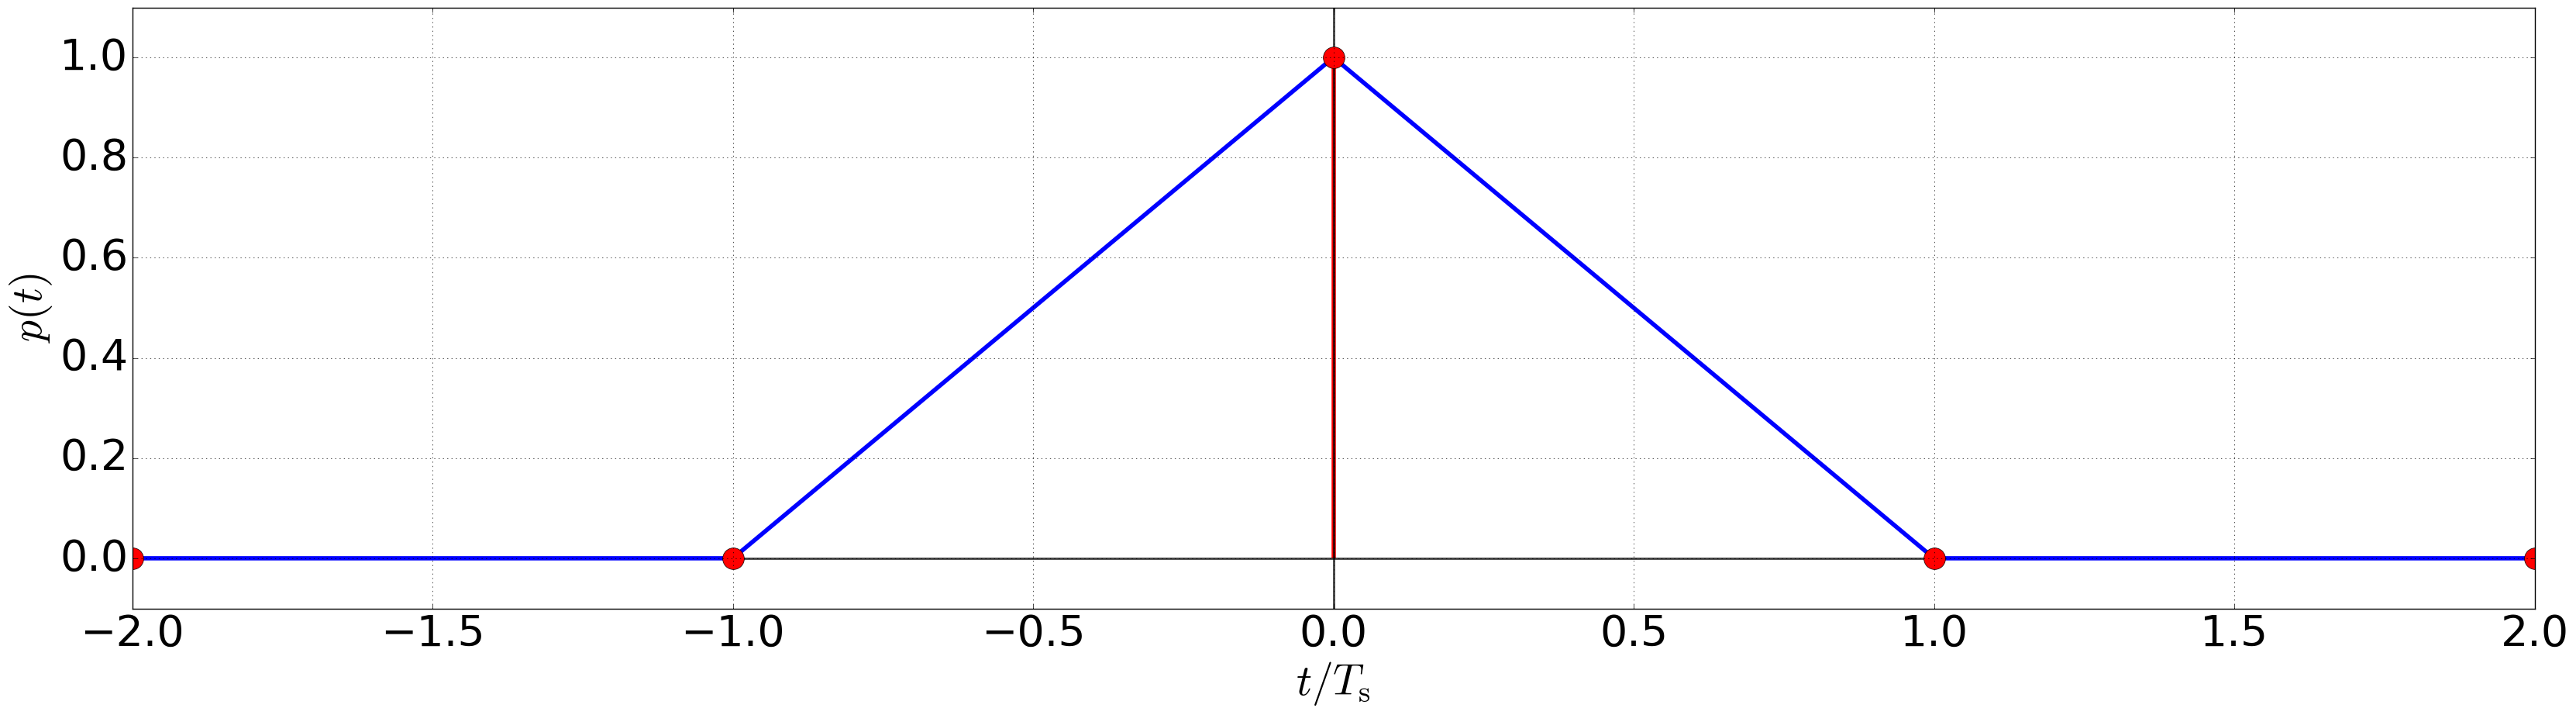

In [12]:
p_t = tri(t_short, T_s)
plot_complete_pulse(t_short, p_t, y_label=r'$p(t)$')

## 17.2:
Skizzieren sie das Augendiagramm bei ungestörtem Empfang für den Zeitraum von $2 T_\mathrm{s}$. Erfüllt der Puls das erste Nyquistkriterium?

Die Gesamtpulsform ist bereits berechnet worden und lautet mit dem Ergebnis der letzten Aufgabe:

\begin{align}
    p(t) = \Lambda\left(\frac{t}{T_\mathrm{s}}\right)
\end{align}

Diese Pulsform erfüllt offensichtlich das erste Nyquistkriterium. Dies wurde bereits in der ersten Aufgabe ausgenutzt.

Um das Augendiagramm zu skizzieren, muss eine geeignete Symbolsequenz so festgelegt werden, dass alle Transitionen enthalten sind. Dies ist zum Beispiel durch $b_n = \{0, 1, 0, 1, 1, 0, 0, 0\}$ erfüllt.

In [13]:
bit_sequence = np.array([0, 1, 0, 1, 1, 0, 0, 0])
symbol_sequence = 2*bit_sequence - 1

# Padding, damit genug Raum fuer Faltungen bleibt
A_k = np.concatenate(([0, 0, 0, 0], symbol_sequence, [0, 0]))

# Fuer "lange" Signale
t = np.r_[-3*T_s:(A_k.shape[0] - 4)*T_s+delta_t:delta_t]

# Kontinuierliche Darstellung als gewichtete Dirac-Impulsfolge
A_t = np.zeros_like(t)
A_t[t % T_s < 0.001] = A_k/delta_t

Das Entscheidungssignal sieht bei $n(t) = 0$ folgendermaßen aus:

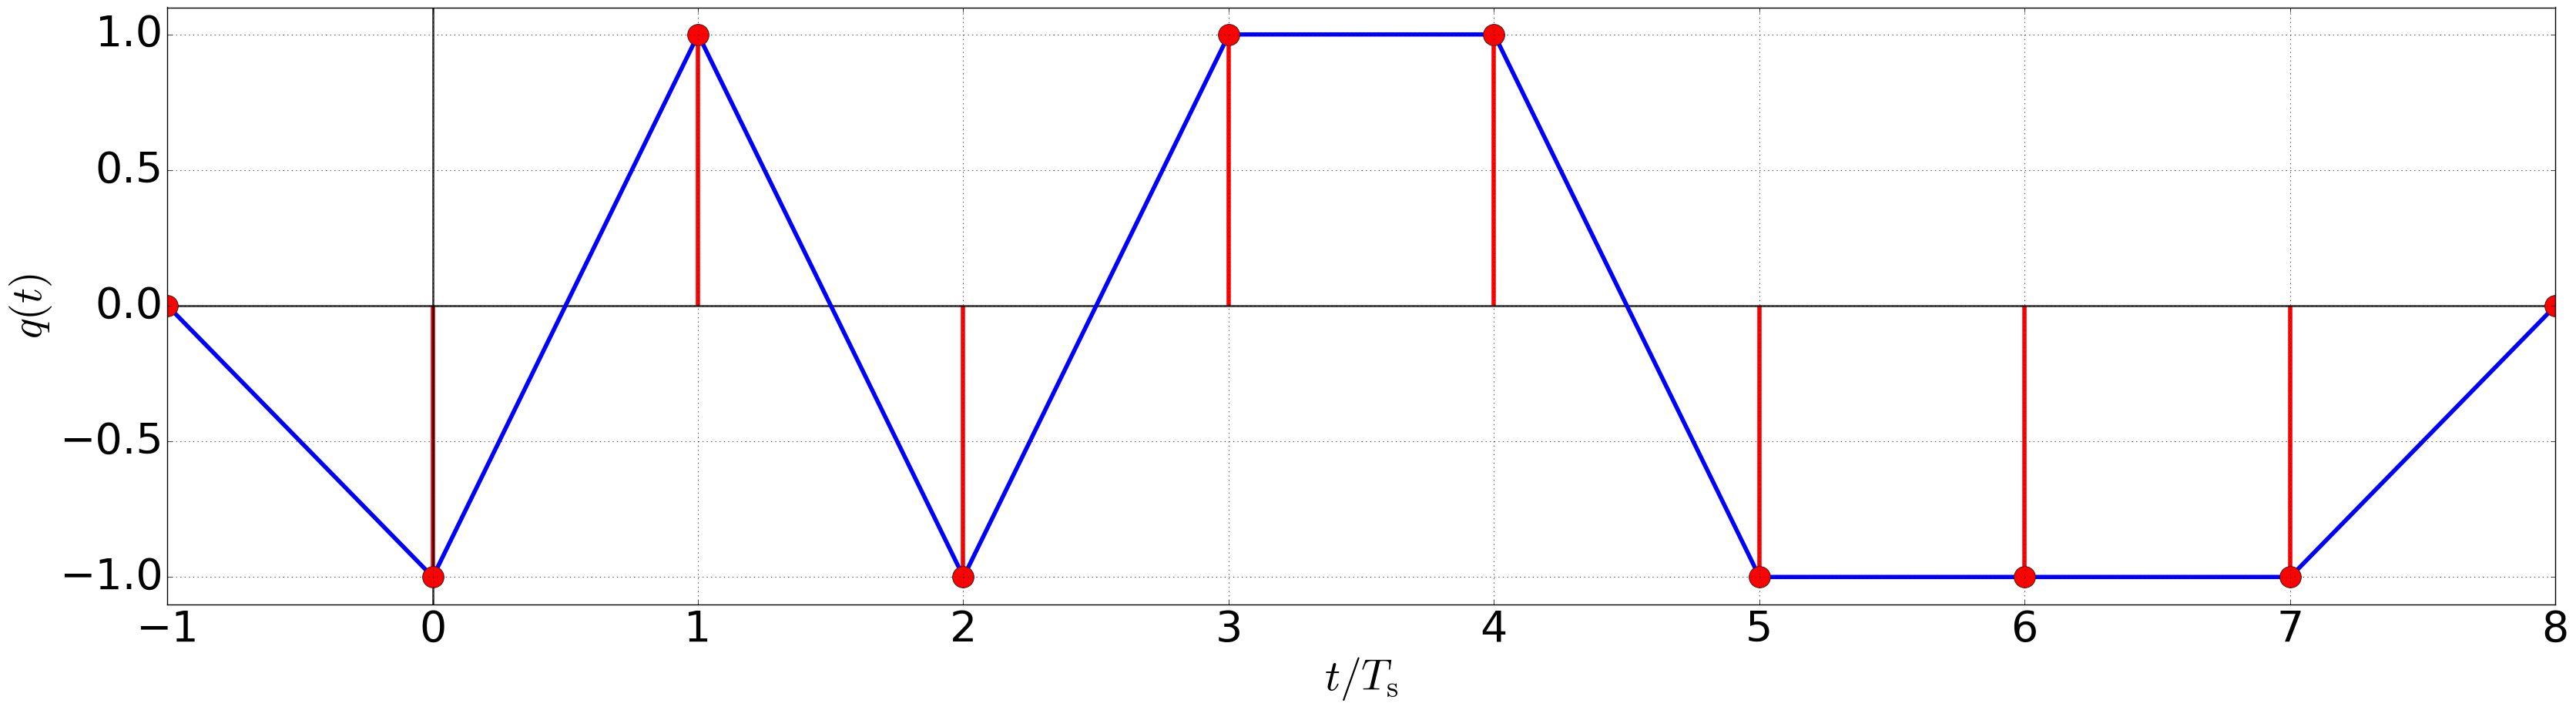

In [14]:
q_t = lti_filter(A_t, p_t)
plot_decision_signal(t, q_t, y_label=r'$q(t)$')

Durch Überlagerung der verschobenen Pulse lässt sich damit das folgende Augendiagramm konstruieren, wobei Einschwingen und Ausschwingen enthalten sind:

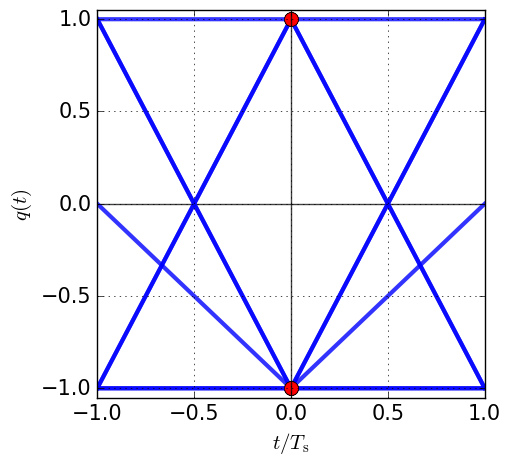

In [15]:
plot_eye_diagram(q_t, t=t, y_label=r'$q(t)$')

## 17.3:
Bestimmen sie das Leistungsdichtespektrum $\Phi_{ss}(j\omega)$ des Sendesignals $s(t)$. Wieviel Bandbreite belegt das Sendesignal?

Aus der Vorlesung ist bekannt, dass das LDS des Sendesignals folgendermaßen zu bestimmen ist:

\begin{align}
    \Phi_{ss}(j\omega) = \frac{1}{T_\mathrm{s}} \Phi_{AA}\left( \mathrm{e}^{j\omega T_\mathrm{s}}\right) \cdot \left|G(j\omega)\right|^2
\end{align}

Dazu müssen das **LDS der Symbolsequenz** und das **Spektrum des Sendepulses** bestimmt werden.

#### LDS der Symbolsequenz
Laut Aufgabenstellung ist der Bitstrom redundanzfrei. 
Redundanzfreiheit heißt, dass die überschüssige Information im Bitstrom eliminiert wurde (Mehr dazu im letzten Kapitel der Vorlesung).
Dies hat zwei Auswirkungen auf die Symbolsequenz:
* Redundanzfreiheit bewirkt, dass der Bitstrom weiß sein muss, da ansonsten von Nachbarbits auf das aktuelle Bit geschlossen werden könnte, was ein Symptom überschüssiger Information wäre. Damit ist auch die Symbolsequenz weiß  und das LDS ist gleich der Varianz: $\Phi_{AA}\left( \mathrm{e}^{j\omega T_\mathrm{s}}\right) = \sigma_A^2$ (weil weiße Prozesse auch stationär und damit auch mittelwertfrei sein müssen).
* Durch die Redundanzfreiheit sind Nullen und Einsen im Bitstrom gleich wahrscheinlich. 

Der zweite Punkt spielt für ein BPSK-Symbolalphabet keine Rolle, denn

\begin{align}
    \Phi_{AA}\left( \mathrm{e}^{j\omega T_\mathrm{s}}\right) = \sigma_A^2 = \mathrm{E}\left[ |A(k)|^2 \right] = ({-}1)^2 \mathrm{Pr}(b_n = 0) + ({+}1)^2 \mathrm{Pr}(b_n = 1) = 1,
\end{align}
Die Varianz ist also wegen $|1| = |-1| = 1$ ohnehin unabhängig von den Bitwahrscheinlichkeiten.

Für höherstufige Symbolalphabete ist dies jedoch wichtig, weil damit auch **alle** Symbole des Alphabets gleich wahrscheinlich sind, wenn immer gleich viele Bits pro Symbol codiert werden.

#### Spektrum des Sendepulses
Das Spektrum des Sendepulses lässt sich durch Fouriertransfomration bestimmen:

\begin{align}
    G(j\omega) = \mathcal{F} \left\{ g(t) \right\} = \mathcal{F} \left\{ \mathrm{rect}\left(\frac{t}{T_\mathrm{s}} \right) \right\} = T_\mathrm{s} \mathrm{si} \left( \frac{\omega T_\mathrm{s}}{2} \right).
\end{align}

Damit folgt für das LDS des Sendesignals:

\begin{align}
    \Phi_{ss}(j\omega) &= \frac{1}{T_\mathrm{s}} 1 \cdot \left| T_\mathrm{s} \mathrm{si} \left( \frac{\omega T_\mathrm{s}}{2} \right) \right|^2 \\
    &= T_\mathrm{s} \mathrm{si}^2  \left( \frac{\omega T_\mathrm{s}}{2} \right)\\
    &= P(j\omega)
\end{align}

Bei Matched-Filterung und weißer Symbolsequenz ist das LDS des Sendesignals also im Wesentlichen durch die Form des Gesamtfilters festgelegt.

Weil der $\mathrm{si}^2$ unendlich ausgedehnt ist, ist die Bandbreite auch unendlich groß.

Die Symbolrate $\frac{1}{T_\mathrm{s}}$ ist jedoch ein Maß dafür, wie breit das Maximum des $si^2$-förmigen Spektrums um Null herum ist.

#### Anmerkung zur Praxis:
In der Praxis würde dies dazu führen, dass das in der Realität am häufigsten anzutreffende Tiefpassverhalten des Kanals die Rechtecke im Zeitbereich "verschleifen" würde, also die Flanken runder und weniger steil werden ließe. Eine Reduktion der Bandbreite des Pulses kann jedoch nur statfinden, in dem die Symbolrate (und damit die Bitrate) verringert wird. Die Bandbreite des Kanals setzt der Übertragung also eine physikalische Grenze.

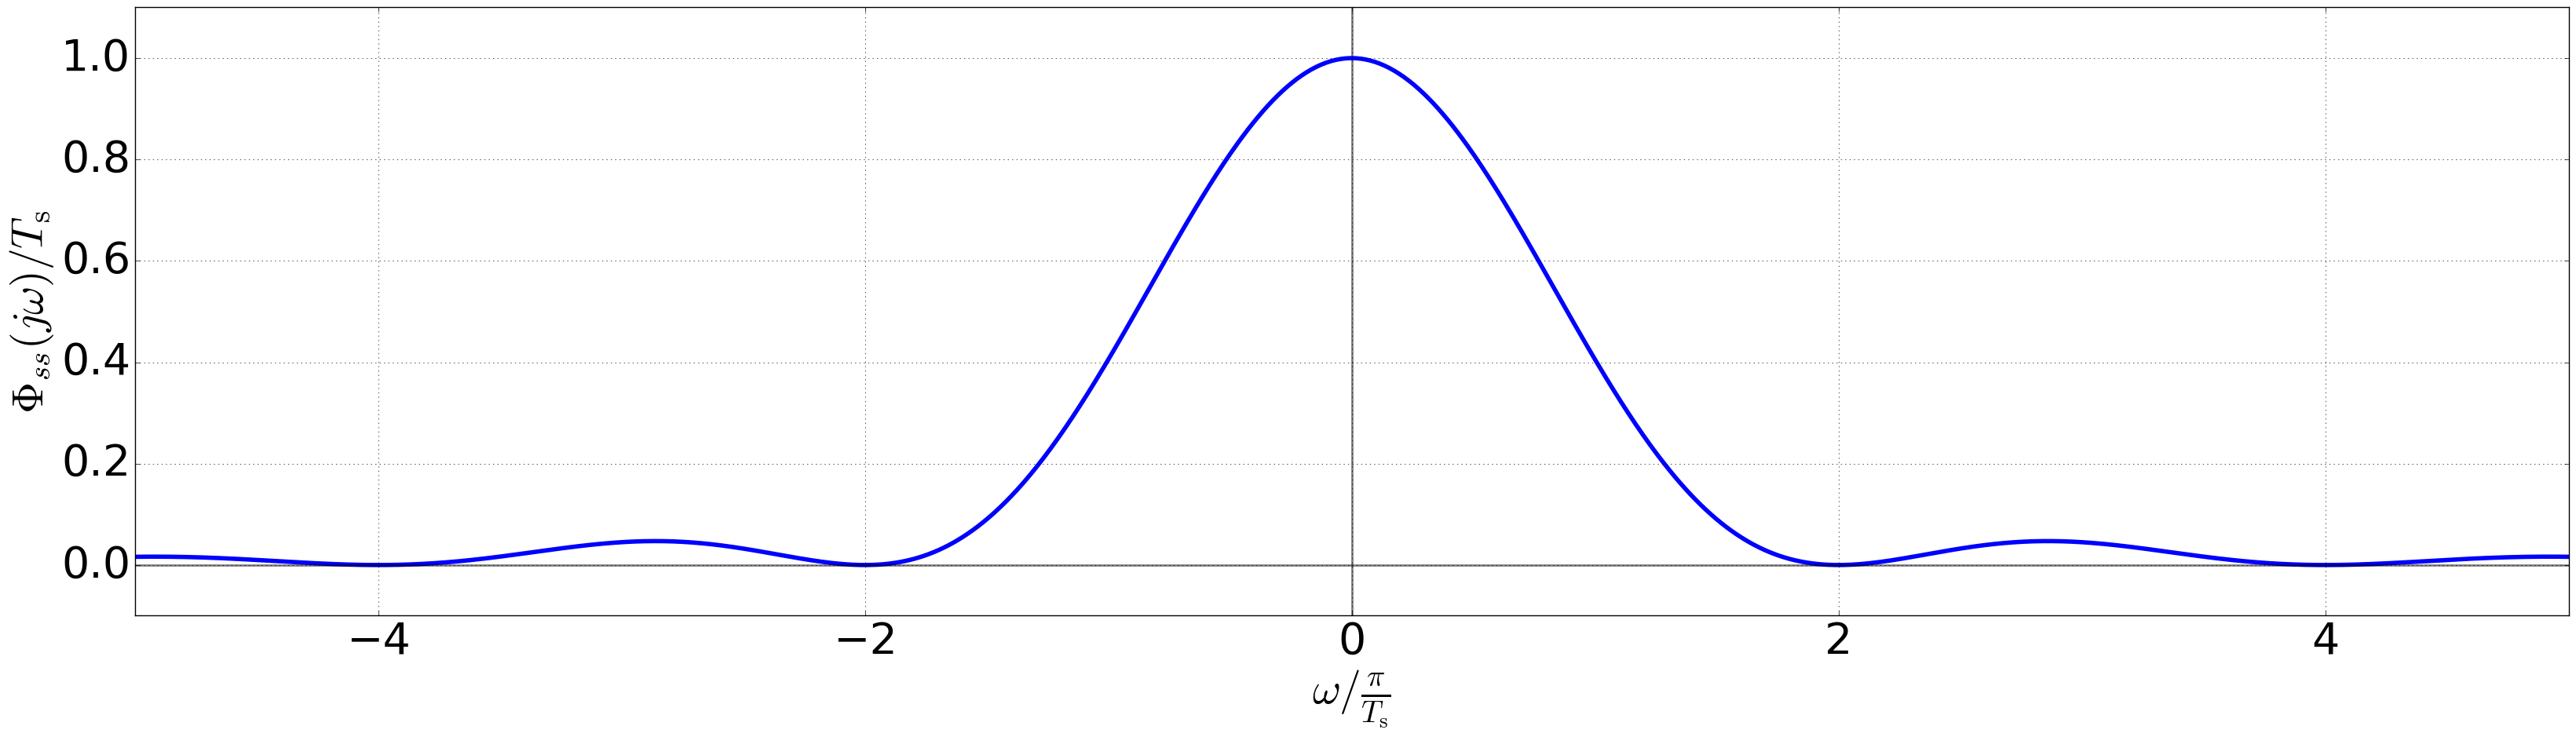

In [16]:
omega = np.linspace(-5*np.pi/T_s, 5*np.pi/T_s, 1000)
pds_ss = T_s*np.sinc(omega*T_s/(2*np.pi))**2
plt.axvline(c='k', alpha=0.5)
plt.plot(omega*T_s/np.pi, pds_ss/T_s, lw=4)
plt.axhline(c='k', alpha=0.5)
plt.ylim((-0.1, 1.1))
plt.xlim((-5, 5))
plt.xlabel(r'$\omega/\frac{\pi}{T_\mathrm{s}}$')
plt.ylabel(r'$\Phi_{ss}(j\omega)/T_\mathrm{s}$')
plt.grid(True);

## 17.4:
Bestimmen sie das Leistungsdichtespektrum $\Phi_{n'n'}(j\omega)$ und die Autokorrelationsfunktion $\varphi_{n'n'}(\tau)$ des Rauschens $n'(t)$ **hinter** dem Empfangsfilter.

Es gilt $n'(t) = n(t) \ast f(t)$. Das LDS kann also über die Wiener-Lee-Beziehung bestimmt werden:

\begin{align}
    \Phi_{n'n'}(j\omega) &= \Phi_{nn}(j\omega) \cdot \left|F(j\omega)\right|^2 \\
    &= \frac{N_0}{2} \cdot \left|\mathrm{si}\left( \frac{\omega T_\mathrm{s}}{2} \right) \right|^2 \\
    &= \frac{N_0}{2} \cdot \mathrm{si}^2 \left( \frac{\omega T_\mathrm{s}}{2} \right)
\end{align}

Wegen des Matched-Filters sieht das LDS des Rauschens vor dem Abtaster also im Wesentlcihen so aus wie das LDS des Sendesignals.

Die AKF lässt sich mit dem Wiener-Khinchine-Theorem durch Rücktransformation bestimmen:

\begin{align}
    \varphi_{n'n'}(\tau) &= \mathcal{F}^{-1} \left\{ \Phi_{n'n'}(j\omega) \right\} \\
    &= \frac{N_0}{2 T_\mathrm{s}} \Lambda \left( \frac{\tau}{T_\mathrm{s}} \right)
\end{align}

Durch Abtastung der AKF lässt sich auch erkennen, dass der Rauschanteil in der Entscheidungsvariablen weiß ist:

\begin{align}
    \varphi_{n'n'}(\lambda) &= \varphi_{n'n'}(\lambda T_\mathrm{s}) \\
    &= \frac{N_0}{2 T_\mathrm{s}} \gamma(\lambda)
\end{align}

## 17.5:
Bestimmen Sie das SNR ([Signal to Noise Ratio](https://en.wikipedia.org/wiki/Signal-to-noise_ratio)) der Entscheidungsvariable $q(k)$ bei optimaler Abtastung in $\mathrm{dB}$.

Bei präsentem Rauschen gilt **für ISI-Freiheit** analog zum Fall oben:

\begin{align}
    q(k) = A(k)p(0) + n'(k T_\mathrm{s})
\end{align}

Für das SNR müssen die Leistungen beider Anteile ins Verhältnis gesetzt werden:

\begin{align}
    S_q &= \mathrm{E} \left[ | A(k)p(0) |^2 \right] \\
        &= \mathrm{E} \left[ | A(k) |^2 \right] (p(0))^2 \\
        &= \sigma_A^2 = 1
\end{align}

\begin{align}
    N_q = \varphi_{n'n'}(0) = \frac{N_0}{2 T_\mathrm{s}}
\end{align}

Damit folgt:

\begin{align}
    \mathrm{SNR} &= \frac{S_q}{N_q} = \frac{2 T_\mathrm{s} \sigma_A^2}{N_0} \\
    &= \frac{1}{\frac{N_0}{2} \cdot \frac{1}{T_\mathrm{s}}} = \frac{1}{10^{-6}\mathrm{Hz}^{-1} \cdot 10^4 \mathrm{s}^{-1} } = 10^2
\end{align}

Dies lässt sich in Dezibel umrechnen:

\begin{align} 
    \mathrm{SNR}_\mathrm{dB} = 10 \log_{10}(\mathrm{SNR}) = 20\,\mathrm{dB}
\end{align}

## 17.6:
Bestimmen sie die Symbolfehlerwahrscheinlichkeit.

Bei BPSK und Matched-Filter-Empfang gilt immer:

\begin{align}
    P_s = Q\left(\sqrt{\frac{2~E_s}{N_0}}\right) = Q\left(\sqrt{\mathrm{SNR}}\right)
\end{align}

Im gegebenen Fall gilt übrigens $E_h = E_g = T_\mathrm{s} \Rightarrow E_s = \sigma_A^2 E_g = 1 \cdot T_\mathrm{s}$ (Nachrechnen!). Für den Matched-Filter-Fall lässt sich Teilaufgabe **17.5** also noch wesentlich einfacher lösen.

Dies heißt für die Fehlerrate:

\begin{align}
    P_s = Q \left(\sqrt{10^2} \right) = Q(10) \approx 7.83\cdot10^{{-}4}
\end{align}

In [17]:
# Berechnung der Symbolfehlerrate
SNR = 10**2
P_s = q_func(np.sqrt(10))
print("Ps = {:1.6f}".format(P_s))

Ps = 0.000783


Die Abhängigkeit der Symbolfehlerrate vom SNR lässt sich sehr gut durch einen doppeltlogarithmischen Plot veranschaulichen:

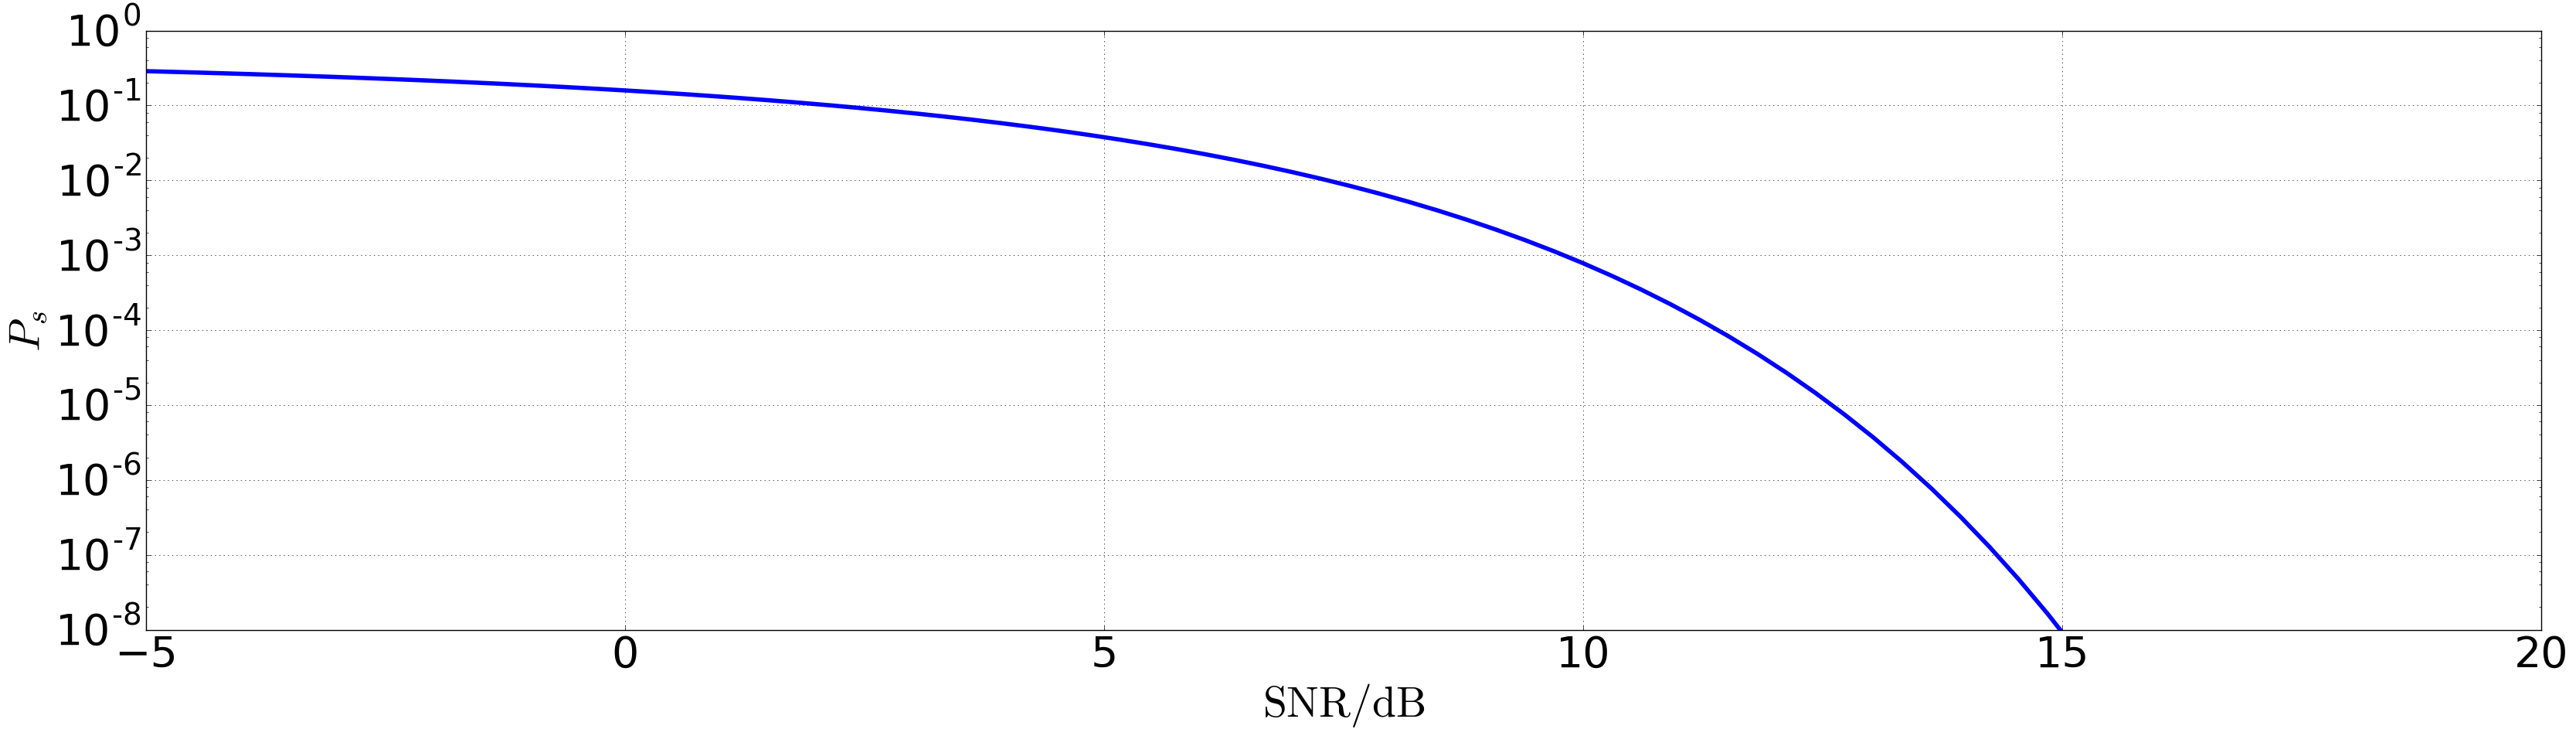

In [38]:
SNR_dB = np.linspace(-10, 20, 100) # SNR in dB
SNR_lin = 10**(SNR_dB/10)
sym_err_rate = q_func(np.sqrt(SNR_lin))

plt.semilogy(SNR_dB, sym_err_rate, lw=4)
plt.xlabel(r'$\mathrm{SNR}/\mathrm{dB}$')
plt.ylabel(r'$P_s$')
plt.xlim((-5, 20))
plt.ylim((10**(-8), 1))
plt.grid(True)

Es wird nun eine nicht optimale Abtastung der Symbole zu den Zeiten

\begin{align}
    t_k = (k+\epsilon)T_\mathrm{s} && 0 \le \epsilon \le \frac{1}{2}
\end{align}

vorgenommen.

## 17.7:
Welche Effekte treten nun zusätzlich zum Rauschen auf? Bestimmen sie das SINR ([Signal to Interference plus Noise Ratio](https://en.wikipedia.org/wiki/Signal-to-interference-plus-noise_ratio)) in Abhängigkeit von $\epsilon$, das alle Störungen berücksichtigt.

Bei fehlerhafter Abtastung haben die Nachbarsymbole Einfluss auf den Abtastwert. Außerdem ist der Einfluss des eigentlichen Symbols verringert. Es muss wegen $\epsilon > 0$ also auch das Symbol für $m = k+1$ berücksichtigt werden, während für alle anderen Symbole der Puls schon zu Null abgeklungen ist:

\begin{align}
    q(t_k) = q((k+\epsilon)T_\mathrm{s}) &= \sum_{m=-\infty}^{\infty} A(m) p((k + \epsilon -m)T_\mathrm{s}) + n'((k+\epsilon)T_\mathrm{s}) \\
    &= A(k)p((k+\epsilon -k)T_\mathrm{s}) + A(k{+}1)p((k+\epsilon -(k+1))T_\mathrm{s}) \\
    &= A(k)\Lambda(\epsilon) + A(k{+}1)\Lambda(\epsilon - 1) + n'((k+\epsilon)T_\mathrm{s}) \\
    &= A(k)\left(1 - |\epsilon| \right) + A(k{+}1)\left(1 - |\epsilon - 1| \right) + n'((k+\epsilon)T_\mathrm{s})
\end{align}

Dabei wurde im letzten Schritt die Definition des Dreieckimpulses verwendet. Wird wie so häufig $\epsilon > 0$ verwendet, kann der Ausdruck durch Auflösen der Beträge vereinfacht werden:

\begin{align}
    q(t_k) = A(k)\left(1 -\epsilon\right) + A(k{+}1)\cdot \epsilon + n'((k+\epsilon)T_\mathrm{s})
\end{align}

Weil die Symbole unkorreliert zueinander und zum Rauschen sind, kann für jeden Summanden einzeln die Leistung berechnet werden. Am Rauschleistungsterm hat sich wegen der Stationarität nichts verändert. Es gilt:

\begin{align}
    S_q &= \mathrm{E} \left[ |A(k)\left(1 -\epsilon\right)|^2 \right]\\
    &= \sigma_A^2\cdot(1-\epsilon)^2 \\[1em]
    S_{q,\mathrm{ISI}} &= \mathrm{E} \left[ |A(k{+}1)\cdot \epsilon|^2 \right] \\
    &= \sigma_A^2 \cdot \epsilon^2 \\[1em]
    N_q &= \frac{N_0}{2 T_\mathrm{s}}
\end{align}

Das SINR kann nun durch Bildung des Quotienten berechnet werden:

\begin{align}
    \mathrm{SINR}(\epsilon) &= \frac{S_q}{S_{q,\mathrm{ISI}} + N_q} \\
    &= \frac{\sigma_A^2\cdot(1-\epsilon)^2 }{\sigma_A^2 \cdot \epsilon^2 + \frac{N_0}{2 T_\mathrm{s}}} \\
    &= \mathrm{SNR} \cdot \frac{(1-\epsilon)^2}{1 + \mathrm{SNR}\cdot\epsilon^2} \\
    &= 100 \cdot \frac{(1-\epsilon)^2}{1 + 100\cdot\epsilon^2}
\end{align}

Im schlimmsten Fall ($\epsilon = \frac{1}{2}$) ist also $\mathrm{SINR}(1/2) = \frac{25}{26} < 1$, d.h. die Störterme sind bei Verschiebung um die halbe Abtastdauer bereits stärker als das Nutzsignal! Dies ist der Grund, weshalb Augendiagramme eine breite horizontale Öffnung haben sollen: je länger der Puls auf hohem Niveau verleibt, desto robuster ist das System gegen Abtastfehler.

Für große SNR lässt sich übrigens beim Dreieckpuls folgende Abschätzung treffen:

\begin{align}
    \mathrm{SINR}(\epsilon) \approx \frac{(1-\epsilon)^2}{\epsilon^2} = \left(\frac{1}{\epsilon} -1 \right)^2
\end{align}